In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

In [2]:
bias = 100
X, y, coef= make_regression(n_features=10, noise=10, random_state=42, bias=bias, coef=True)

In [3]:
bias, coef

(100, array([16.74825823, 54.12963353,  5.19712837, 63.64302495, 93.62122462,
        70.64757265, 87.09691237, 10.45678403,  3.15861448, 70.90605195]))

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
model = LinearRegression()

In [6]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
model.coef_

array([18.44650538, 55.30466977,  3.91111033, 62.96900247, 93.29857383,
       69.95170969, 85.5274906 ,  9.1007422 ,  3.70811268, 70.7572512 ])

In [8]:
model.intercept_

101.30710431843444

In [9]:
y_pred = model.predict(X[:10])

In [10]:
y_pred.shape

(10,)

In [11]:
y.shape

(100,)

In [12]:
X.shape

(100, 10)

In [13]:
coef_ = np.random.randn(X.shape[1])

In [25]:
coef_

array([ 1.1298791 , -0.63176293, -1.10726789,  0.93069525, -0.04072727,
        0.13695113, -0.64281679,  0.3737625 ,  0.22386737, -0.3448061 ])

In [15]:
class CustomLinearReg:
    
    def __init__(self, lr=.1, max_iters=20):
        
        self.lr = lr
        self.max_iters = max_iters
    
    def fit(self, X, y):
        
        self.coef_ = np.random.randn(X.shape[1])
        self.intercept_ = np.random.random()
        
        errors = []
        for i in range(self.max_iters):
            err = self.gradient_decend(X, y)
            errors.append(err)
            
        return errors
            
    def gradient_decend(self, X, y):
        delta_coef, delta_inter, err = self.gradient(X, y)
        
        self.coef_ += delta_coef
        self.intercept_ += delta_inter
        return err
    
    def gradient(self, X, y):
        
        ya = y.reshape(-1, 1)
        yh = self.hypo(X)
        
        diff = (yh-ya)
        
        de2m = np.dot(diff.T, X).flatten()/len(X)
        de2c = np.mean(diff, axis=0)
        
        return -de2m*self.lr, -de2c*self.lr, np.mean(diff**2)
        
    def hypo(self, X):
        return np.sum(self.coef_ * X, axis=1, keepdims=True) + self.intercept_
        

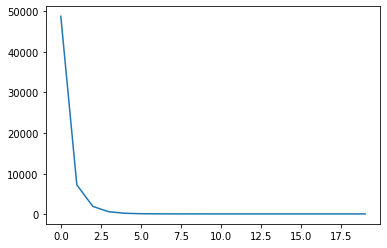

In [16]:
model = CustomLinearReg(lr=1, max_iters=20)

errors = model.fit(X, y)

plt.figure()
plt.plot(errors)
plt.show()

In [19]:
y[:10]

array([-397.16989119,  523.32183177,  303.26741332,  -92.385151  ,
        -90.25149498,  -23.61615478,  -73.96987138,  170.44374742,
        111.82169417,   10.26544397])

In [20]:
y[:10]

array([-397.16989119,  523.32183177,  303.26741332,  -92.385151  ,
        -90.25149498,  -23.61615478,  -73.96987138,  170.44374742,
        111.82169417,   10.26544397])

In [21]:
y_pred = model.hypo(X)

In [23]:
y_pred.shape

(100, 1)